## Week 11. GMM, EM and Dimension reduction 

### Exercise 1. Expectation Maximization and a little computer vision

We have seen that EM can be understood as a smooth version of K-means. Clutering algorithms can be used to segment images. In this exercise, we will use the EM algorithm to split an MRI slice into 3 regions: the region correcponding to the white matter, the gray matter as well asht the lateral ventricles. Consider the image below. 

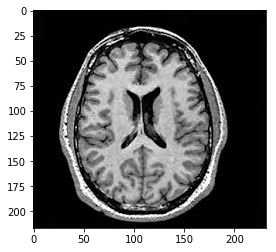

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('MRIBrainSlice.jpg')

imgplot = plt.imshow(img)
plt.show()

As a first step, generate an histogram of the pixel values and try to see if the clusters are already visible from that histogram

Before we apply the segmentation steps, there is a series of preprocessing steps we need to code to make the segmentation efficient. 

- First we will remove the skull which could corrupt the segmentation of the gray matter. To do this, apply the EM algorithm starting from the empirical mean and variance defined from the background and brain pixels positions selected below.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D 

dataBKG = sio.loadmat('background_pts')['background_pts']
dataBrain = sio.loadmat('brain_pts')['brain_pts']

In [ ]:
# display your result here



- Once you are done with this first segmentation step, use the function floodfill from openCV (fill the background) to extract the head contour.   

In [ ]:
import cv2

# put the code here

- Finally once you have the head region, use the functions 'erode' and 'dilate' to remove the skull

In [ ]:
# put your code here


- Now that you have extracted the head area, use the list of positions below to initialize your EM algorithm with a mixture of $3$ Gaussian distributions respectively representing the White matter, Gray matter and lateral ventricles/background.  

In [ ]:
BKG_position = sio.loadmat('EMstep2BKG')['EMstep2BKG']
GrayMatter_position = sio.loadmat('EMstep2grayMatter')['EMstep2grayMatter']
WhiteMatter_position = sio.loadmat('EMstep2WhiteMatter')['EMstep2WhiteMatter']


# put your code here



### Exercise 2. Double centering 

Consider the distance matrix below. Display this matrix using imshow. Then apply double centering to this matrix to recover the matrix of scalar products. Once you have the matrix the scalar product matrix, compute a two dimensional embedding for the data using classical MDS. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D 

dataMDS = sio.loadmat('dataDoubleCentering')['dataDoubleCentering']

x3 = 2*dataMDS[:,0] + dataMDS[:,1] + 1.5 
x3noisy = x3 + np.random.normal(0,1,np.shape(x3))

X = np.hstack((dataMDS, x3noisy.reshape(-1,1)))

from scipy.spatial import distance_matrix

D = distance_matrix(X,X)


### Exercise 3. PCA, Classical Metric MDS and Metric MDS

Although the idea underlying MDS is the pairwise preservation of distances, in its classical version, also known as Torgerson MDS, the algorithm minimizes the difference between pairwise scalar products of the samples before and after the dimension reduction step (also called Strain),

$$\min_{\mathbf{z}} \sum_{ij}\left|\mathbf{K}_{ij} - \langle\mathbf{z}_i, \mathbf{z}_j\rangle \right|^2 $$

The version defining the lower dimensional representation by preserving the pairwise distances is known as metric MDS, and corresponds to minimizes a 'Stress' objective of the form

$$\min_{\mathbf{x}} \sum_{ij} \left|\mathbf{D}_{ij} - d(\mathbf{z}_i, \mathbf{z}_j)\right|$$

In this last case, unlike the classical approach, the low dimensional embedding has to be computed through an iterative procedure. 

Consider the dataset below. For this data, compute the 2D embedding of the points through classical MDS, metric Classical MDS as well as PCA and compare the results. 



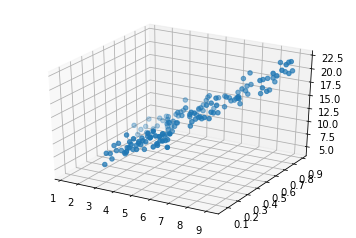

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D 

dataMDS = sio.loadmat('dataSetMDS')['dataSetMDS']

x3 = 2*dataMDS[:,0] + dataMDS[:,1] + 1.5 
x3noisy = x3 + np.random.normal(0,1,np.shape(x3))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataMDS[:,0], dataMDS[:,1], x3noisy)
plt.show()



### Exercise 4. Isomap

Unlike MDS and PCA which rely on Euclidean distances, ISOMAP computes a lower dimensional embedding for the data by trying to capture geodesic distances. 

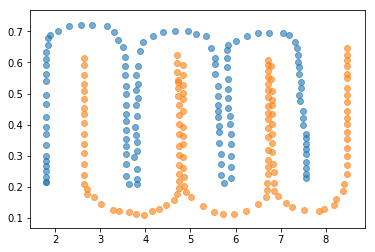

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

ISOMAP_data1 = sio.loadmat('ISOMAP_data1')['ISOMAP_data1']
ISOMAP_data2 = sio.loadmat('ISOMAP_data2')['ISOMAP_data2']

plt.scatter(ISOMAP_data1[:,0],ISOMAP_data1[:,1], alpha=0.6)
plt.scatter(ISOMAP_data2[:,0],ISOMAP_data2[:,1], alpha=0.6)
plt.show()

On this dataset, 

1.Compute the principal direction and the projection of the points onto this principal direction

2.Build the graph through the K rule and the epsilon rule. Take $K=4$ and $\varepsilon = 0.04$.

In [ ]:
# Compute the adjacency matrix of the graph


3.Once we have defined the graph, there are several approaches at computing the distance. Two common alternatives are the _Floyd–Warshall algorithm_ and Dijkstra's algorithm. 


The Floyd–Warshall algorithm iterates on the following step 

for every $k\in \left\{1,\ldots,  n\right\}$, for every $i\in \left\{1,\ldots,  n\right\}$, for every $j\in \left\{1,\ldots,  n\right\}$, repeat

$$ W_{ij}= \min(W_{ij}, W_{ik} + W_{kj})$$


In [ ]:
# Compute the geodesic distance matrix through the Floyd–Warshall algorithm

4.From the geodesic distance matrix, perform double centering and apply the classical MDS decomposition to the resulting scalar products. 

In [ ]:
# code the MDS projection of the geodesic matrix 

5.If you still have time, construct the geodesic distance matrix through Dijkstra's algorithm and compare with 